# Projeto Motor de Credito - Ferramenta de Previsão de Risco de Emprestimo  de pessoas físicas


### Contexto
Será realizada uma análise da base de dados de Loan Credit Club com o objetivo de obter um modelo de previsão de risco de emprestimo basado en la feature de saida 'loan_status' (status_do_empréstimo)

### Objetivo
Obter o melhor modelo de regressão logística baseado na métrica de avaliação AUC para a base de dados de Loan Credit Club.

### Importar Bibliotecas

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
import joblib

### Importar base de dados

In [101]:
df=pd.read_csv('loans_score_credit_v100.csv')
df

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,data_type
0,clerical asscociate ll,10.0,NY,RENT,38000.0,Verified,3.35,NaN,NaN,NaN,...,Feb-2018,Current,whole,Cash,27530.98,4513.050000,2469.02,2044.03,0.0,train
1,senior analyst,10.0,IL,RENT,71000.0,Not Verified,29.53,NaN,NaN,NaN,...,Feb-2018,Current,whole,Cash,22772.89,2053.450000,1227.11,826.34,0.0,train
2,director for engineering,1.0,CA,RENT,160000.0,Source Verified,6.59,NaN,NaN,NaN,...,Mar-2018,Current,whole,Cash,33876.29,2685.280000,1123.71,1561.57,0.0,train
3,executive chef,2.0,CA,MORTGAGE,200000.0,Source Verified,10.67,NaN,NaN,NaN,...,Feb-2018,Current,whole,Cash,17931.76,2394.420000,2068.24,326.18,0.0,train
4,project accountant,0.0,CA,RENT,46080.0,Not Verified,19.38,NaN,NaN,NaN,...,Mar-2018,Current,whole,Cash,14236.20,908.560000,763.80,144.76,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,operations manager,6.0,NV,RENT,62400.0,Verified,16.44,NaN,NaN,NaN,...,Jan-2018,Current,whole,Cash,10916.71,1655.090000,1083.29,571.80,0.0,test
9996,fixed assets manager,10.0,OK,MORTGAGE,72900.0,Not Verified,21.05,NaN,NaN,NaN,...,Feb-2018,Current,whole,Cash,31729.59,4667.060000,3270.41,1396.65,0.0,test
9997,NaN,NaN,CA,RENT,25825.0,Not Verified,10.46,NaN,NaN,NaN,...,Jan-2018,Current,whole,Cash,4420.65,840.060000,579.35,260.71,0.0,test
9998,engineer,5.0,CA,MORTGAGE,101000.0,Verified,14.40,NaN,NaN,NaN,...,Mar-2018,Current,whole,Cash,13920.33,1443.380000,1079.67,363.71,0.0,test


## Tratamentos da base de dados

### Valores faltando 

In [102]:
print(df.isnull().sum())

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

### Tratar Valores Faltando

- Visualizando os dados, percebi que existe uma grande disparidade em dados faltantes. As colunas com mais de 5000 valores NaN (equivalente a mais 50% dos valores faltantes) foram excluídas da análise
- Para as outras colunas vou a excluir as linhas que contém dados NaN (como se tem 10000 linhas, não vai ser muito relevante)

In [103]:
for coluna in df:
    if df[coluna].isnull().sum() > 5000:
        df = df.drop(coluna, axis=1)
print(df.isnull().sum())

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
delinq_2y                              0
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_24m                    0
months_since_last_credit_inquiry    1271
num_satisfactory_accounts              0
num_accounts_120d_past_due           318
num_accounts_30d_past_due              0
num_active_debit

In [104]:
df = df.dropna()
print(df.isnull().sum())
print(df.shape)

emp_title                           0
emp_length                          0
state                               0
homeownership                       0
annual_income                       0
verified_income                     0
debt_to_income                      0
delinq_2y                           0
earliest_credit_line                0
inquiries_last_12m                  0
total_credit_lines                  0
open_credit_lines                   0
total_credit_limit                  0
total_credit_utilized               0
num_collections_last_12m            0
num_historical_failed_to_pay        0
current_accounts_delinq             0
total_collection_amount_ever        0
current_installment_accounts        0
accounts_opened_24m                 0
months_since_last_credit_inquiry    0
num_satisfactory_accounts           0
num_accounts_120d_past_due          0
num_accounts_30d_past_due           0
num_active_debit_accounts           0
total_debit_limit                   0
num_total_cc

### Verificar Tipos de Dados em cada coluna

In [105]:
print(df.dtypes)
print('*'*60)
print(df.iloc[0])

emp_title                            object
emp_length                          float64
state                                object
homeownership                        object
annual_income                       float64
verified_income                      object
debt_to_income                      float64
delinq_2y                             int64
earliest_credit_line                  int64
inquiries_last_12m                    int64
total_credit_lines                    int64
open_credit_lines                     int64
total_credit_limit                    int64
total_credit_utilized                 int64
num_collections_last_12m              int64
num_historical_failed_to_pay          int64
current_accounts_delinq               int64
total_collection_amount_ever          int64
current_installment_accounts          int64
accounts_opened_24m                   int64
months_since_last_credit_inquiry    float64
num_satisfactory_accounts             int64
num_accounts_120d_past_due      

- tipos de dados corretos

### Codifique a feature de tipo objeto como um tipo enumerado ou variável categórica.

Este método é útil para obter uma representação numérica de um array quando tudo o que importa é identificar valores distintos

In [106]:
text_columns = df.select_dtypes(include=['object']).columns.tolist()
text_columns

['emp_title',
 'state',
 'homeownership',
 'verified_income',
 'loan_purpose',
 'application_type',
 'grade',
 'sub_grade',
 'issue_month',
 'loan_status',
 'initial_listing_status',
 'disbursement_method',
 'data_type']

In [95]:
print(df['loan_status'].value_counts())

loan_status
Current               7252
Fully Paid             371
In Grace Period         51
Late (31-120 days)      49
Late (16-30 days)       30
Charged Off              5
Name: count, dtype: int64


In [107]:
labels_dict = {}
for i in text_columns:
    df[i], labels_dict[i] = df[i].factorize()

In [108]:
print(df['loan_status'].value_counts())

loan_status
0    7252
1     371
4      51
3      49
2      30
5       5
Name: count, dtype: int64


In [109]:
labels_dict

{'emp_title': Index(['clerical asscociate ll', 'senior analyst', 'director for engineering',
        'executive chef', 'apprentice lineman', 'safety coordinator',
        'store manager', 'business specialist', 'lead architect',
        'career and transition',
        ...
        'dsr', 'member', 'web content manager', 'snr project engineer',
        'pacs admin', 'medical support assistant ', 'interior tech',
        'sr mech spec', 'repairman', 'fixed assets manager'],
       dtype='object', length=4116),
 'state': Index(['NY', 'IL', 'CA', 'CO', 'TX', 'IN', 'NV', 'OH', 'VA', 'MI', 'MO', 'NC',
        'FL', 'MA', 'MT', 'NE', 'OR', 'TN', 'ME', 'MD', 'WI', 'GA', 'HI', 'PA',
        'WY', 'MN', 'AZ', 'WA', 'NJ', 'CT', 'WV', 'NM', 'NH', 'LA', 'KS', 'OK',
        'AL', 'KY', 'ID', 'MS', 'AR', 'RI', 'UT', 'SD', 'SC', 'VT', 'AK', 'DE',
        'DC', 'ND'],
       dtype='object'),
 'homeownership': Index(['RENT', 'MORTGAGE', 'OWN'], dtype='object'),
 'verified_income': Index(['Verified', 'No

## Analise exploratoria 

- Ver a correlação entre as features e a variavel loan_status (status_do_empréstimo).
- Confirmar se todas as features fazem realmente sentido.

<Axes: >

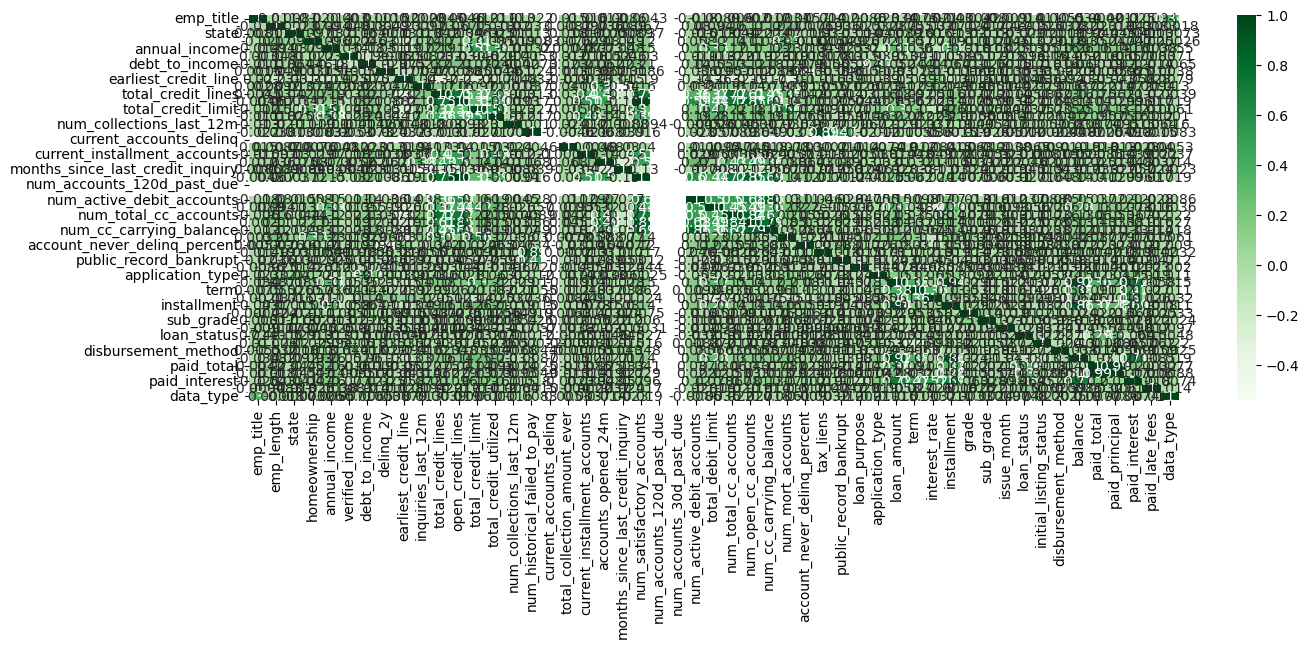

In [82]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(), annot=True, cmap='Greens')

- correlação das colunas ordenadas decreciente

In [110]:
corr_with_target = df.corr()['loan_status'].abs().sort_values(ascending=False)
print(corr_with_target)

loan_status                         1.000000
paid_principal                      0.303385
paid_total                          0.290264
paid_late_fees                      0.147047
balance                             0.127145
interest_rate                       0.092029
paid_interest                       0.063576
months_since_last_credit_inquiry    0.045418
loan_purpose                        0.040694
num_active_debit_accounts           0.037004
num_cc_carrying_balance             0.031029
state                               0.029171
issue_month                         0.028461
open_credit_lines                   0.027192
disbursement_method                 0.027049
num_satisfactory_accounts           0.026831
num_open_cc_accounts                0.024707
initial_listing_status              0.021590
inquiries_last_12m                  0.020293
application_type                    0.020148
public_record_bankrupt              0.017592
debt_to_income                      0.017258
verified_i

- dataframe com as columnas que tem uma correlação maior de 1%

In [111]:
columnas_corr=corr_with_target.head(len([i for i in corr_with_target if i>0.01])).index.tolist()
df=df[columnas_corr]
df

,loan_status,paid_principal,paid_total,paid_late_fees,balance,interest_rate,paid_interest,months_since_last_credit_inquiry,loan_purpose,num_active_debit_accounts,...,sub_grade,emp_title,term,annual_income,homeownership,num_historical_failed_to_pay,installment,num_total_cc_accounts,current_installment_accounts,num_collections_last_12m
0,0,2469.02,4513.050000,0.0,27530.98,21.45,2044.03,17.0,0,0,...,0,0,36,38000.0,0,0,1137.20,4,0,0
1,0,1227.11,2053.450000,0.0,22772.89,10.90,826.34,7.0,1,4,...,1,1,60,71000.0,0,0,520.63,12,3,0
2,0,1123.71,2685.280000,0.0,33876.29,17.47,1561.57,11.0,0,5,...,2,2,60,160000.0,0,0,878.71,10,2,0
3,0,2068.24,2394.420000,0.0,17931.76,5.32,326.18,10.0,0,3,...,3,3,36,200000.0,1,0,602.30,18,3,0
5,0,3897.47,5139.850000,0.0,28102.53,9.93,1242.38,6.0,2,0,...,4,4,36,54000.0,0,0,1031.50,7,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,0,770.00,1022.540000,0.0,15230.00,9.92,252.54,1.0,0,3,...,4,54,36,80000.0,1,0,515.68,12,1,0
9995,0,1083.29,1655.090000,0.0,10916.71,15.05,571.80,2.0,3,5,...,7,229,36,62400.0,0,0,416.28,10,1,0
9996,0,3270.41,4667.060000,0.0,31729.59,12.62,1396.65,3.0,0,2,...,12,4115,36,72900.0,1,0,1172.90,13,1,0
9998,0,1079.67,1443.380000,0.0,13920.33,10.41,363.71,3.0,0,7,...,22,458,36,101000.0,1,0,486.91,23,3,0


### Criação do modelo de Logistic Regression

In [112]:
X = df.drop(columns=['loan_status'],axis=1)
Y = df['loan_status']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, stratify=Y, random_state=2)

modelo = LogisticRegression(random_state=0)

modelo.fit(X_train, Y_train)

prediction = modelo.predict(X_test)

acc_xy_test = accuracy_score(prediction, Y_test)
print('Assertividade no conjunto de teste: ', acc_xy_test)

Assertividade no conjunto de teste:  0.9819587628865979


C:\Users\Aramary\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Ajuste de hiperparâmetros para tentar otimizar o desempenho do modelo 

- Assertividade do modelo a melhorar:  0.9819587628865979

1- C (Regularization Parameter): O parâmetro C controla a força da regularização. Valores menores de C indicam uma regularização mais forte, o que pode ajudar a evitar o overfitting. Valores maiores de C indicam uma regularização mais fraca, permitindo ao modelo se ajustar mais aos dados de treinamento.

2- penalty: Especifica a norma usada na penalização. As opções comuns são 'l1' (para regularização L1), 'l2' (para regularização L2) e 'elasticnet' (para uma combinação de L1 e L2).

3- solver: O algoritmo usado para otimização do problema. A escolha do solver depende do tamanho do conjunto de dados. Algumas opções incluem 'liblinear', 'lbfgs', 'newton-cg' e 'sag'. 
- O 'liblinear' é adequado para conjuntos de dados pequenos, enquanto 'sag' e 'lbfgs' são mais rápidos para conjuntos de dados grandes. 
- Para problemas multiclasse, apenas 'newton-cg', 'sag', 'saga' e 'lbfgs' lidam com perda multinomial. 
- 'newton-cholesky' é uma boa escolha para n_samples>> n_features, especialmente com recursos categóricos codificados one-hot com categorias raras. Observe que ela está limitada à classificação binária e à redução de um versus resto para classificação multiclasse. Esteja ciente de que o uso de memória deste solucionador tem uma dependência quadrática n_featuresporque ele calcula explicitamente a matriz Hessiana.

A escolha do algoritmo depende da penalidade escolhida. Penalidades suportadas pelo solucionador:

- 'lbfgs' - ['l2', Nenhum]
- 'liblinear' - ['l1', 'l2']
- 'newton-cg' - ['l2', Nenhum]
- 'newton-cholesky' - ['l2', Nenhum]
- 'sag' - ['l2', Nenhum]
- 'saga' - ['elasticnet', 'l1', 'l2', Nenhum]

4- max_iter: Número máximo de iterações para a convergência do otimizador. Aumentar este valor pode ser necessário se o modelo não estiver convergindo.

5- random_state: int, instância RandomState, padrão = Nenhum.
Usado quando solver== 'sag', 'saga' ou 'liblinear' para embaralhar os dados. Consulte o Glossário para obter detalhes.

In [113]:
param_grid = {
    'C': np.arange(0.0001,1,10),  # Exemplo de valores para o parâmetro C
    'penalty': ['l1', 'l2', 'elasticnet'],  # Exemplo de opções para o parâmetro penalty
    'solver': ['liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg', 'newton-cholesky']  # Exemplo de opções para o parâmetro solver
}

model = LogisticRegression()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train,Y_train)

# Exibindo os melhores hiperparâmetros encontrados com GridSearchCV
print("Melhores Hiperparâmetros:", grid_search.best_params_)

# Melhor pontuação com os melhores hiperparâmetros no conjunto de teste
print("Melhor pontuação:", grid_search.best_score_)

prediction_1 = grid_search.predict(X_test)
acc_xy_test_1 = accuracy_score(prediction_1, Y_test)
print('Assertividade no conjunto de teste: ', acc_xy_test_1)

C:\Users\Aramary\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Aramary\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aramary\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aramary\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aramary\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\Aramary\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: Conve

C:\Users\Aramary\anaconda3\Lib\site-packages\sklearn\linear_model\_glm\_newton_solver.py:466: ConvergenceWarning: The inner solver of NewtonCholeskySolver detected a pointwise hessian with many negative values at iteration #16. It will now resort to lbfgs instead.
  warnings.warn(
C:\Users\Aramary\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Aramary\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Aramary\

Melhores Hiperparâmetros: {'C': 0.0001, 'penalty': 'l2', 'solver': 'newton-cg'}
Melhor pontuação: 0.984817958252744
Assertividade no conjunto de teste:  0.9832474226804123


C:\Users\Aramary\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


### Os ajustes de hiperparâmetros consiguieron otimizar a assertividade do desempenho do modelo 

Melhores Hiperparâmetros: {'C': 0.0001, 'penalty': 'l2', 'solver': 'newton-cg'}

Melhor pontuação: 0.984817958252744

Assertividade no conjunto de teste:  0.9832474226804123

- foi usada a tecnica de GridSearchCV para estimar el mejor conjunto de hiperparâmetros

### Salvar o modelo

In [114]:
joblib.dump(grid_search.best_estimator_, 'Modelo_RL_BaseLoan.joblib')

['Modelo_RL_BaseLoan.joblib']

### Cargar o modelo

In [115]:
loaded_model = joblib.load('Modelo_RL_BaseLoan.joblib')
prediction_model = loaded_model.predict(X_test)
accuracy = accuracy_score(prediction_model, Y_test)
print('Assertividade: ', accuracy)

Assertividade:  0.9832474226804123
